In [12]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'UberDataset.csv'
uber_data = pd.read_csv(file_path)

# Data Handling

In [13]:
uber_data['START_DATE'] = pd.to_datetime(uber_data['START_DATE'], errors='coerce')
uber_data['END_DATE'] = pd.to_datetime(uber_data['END_DATE'], errors='coerce')

uber_data['HOUR'] = uber_data['START_DATE'].dt.hour

uber_data['PURPOSE'].fillna('Unknown', inplace=True)

In [19]:
print(uber_data.head(9))

           START_DATE            END_DATE  CATEGORY            START  \
0 2016-01-01 21:11:00 2016-01-01 21:17:00  Business      Fort Pierce   
1 2016-01-02 01:25:00 2016-01-02 01:37:00  Business      Fort Pierce   
2 2016-01-02 20:25:00 2016-01-02 20:38:00  Business      Fort Pierce   
3 2016-01-05 17:31:00 2016-01-05 17:45:00  Business      Fort Pierce   
4 2016-01-06 14:42:00 2016-01-06 15:49:00  Business      Fort Pierce   
5 2016-01-06 17:15:00 2016-01-06 17:19:00  Business  West Palm Beach   
6 2016-01-06 17:30:00 2016-01-06 17:35:00  Business  West Palm Beach   
7 2016-01-07 13:27:00 2016-01-07 13:33:00  Business             Cary   
8 2016-01-10 08:05:00 2016-01-10 08:25:00  Business             Cary   

              STOP  MILES          PURPOSE  HOUR  
0      Fort Pierce    5.1   Meal/Entertain  21.0  
1      Fort Pierce    5.0          Unknown   1.0  
2      Fort Pierce    4.8  Errand/Supplies  20.0  
3      Fort Pierce    4.7          Meeting  17.0  
4  West Palm Beach   63.

In [21]:
print(uber_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1155 non-null   datetime64[ns]
 1   END_DATE    1155 non-null   datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1156 non-null   float64       
 6   PURPOSE     1156 non-null   object        
 7   HOUR        1155 non-null   float64       
dtypes: datetime64[ns](2), float64(2), object(4)
memory usage: 54.3+ KB
None


In [23]:
print(uber_data.describe())

              MILES         HOUR
count   1156.000000  1155.000000
mean      21.115398    14.696104
std      359.299007     4.575226
min        0.500000     0.000000
25%        2.900000    12.000000
50%        6.000000    15.000000
75%       10.400000    18.000000
max    12204.700000    23.000000


# 1. Most Common Purposes for Uber Trips


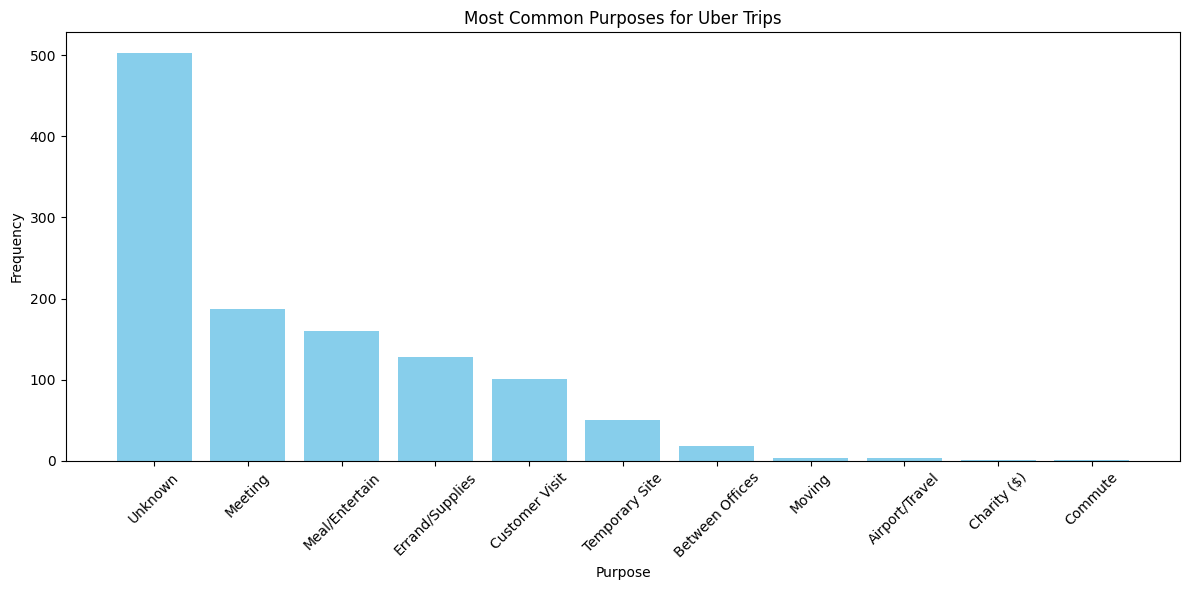

In [37]:
plt.figure(figsize=(12, 6))
common_purposes = uber_data['PURPOSE'].value_counts()
plt.bar(common_purposes.index, common_purposes.values, color='skyblue')
plt.title('Most Common Purposes for Uber Trips')
plt.xlabel('Purpose')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Uber Trip Mileage Trends by Purpose and Time of Day


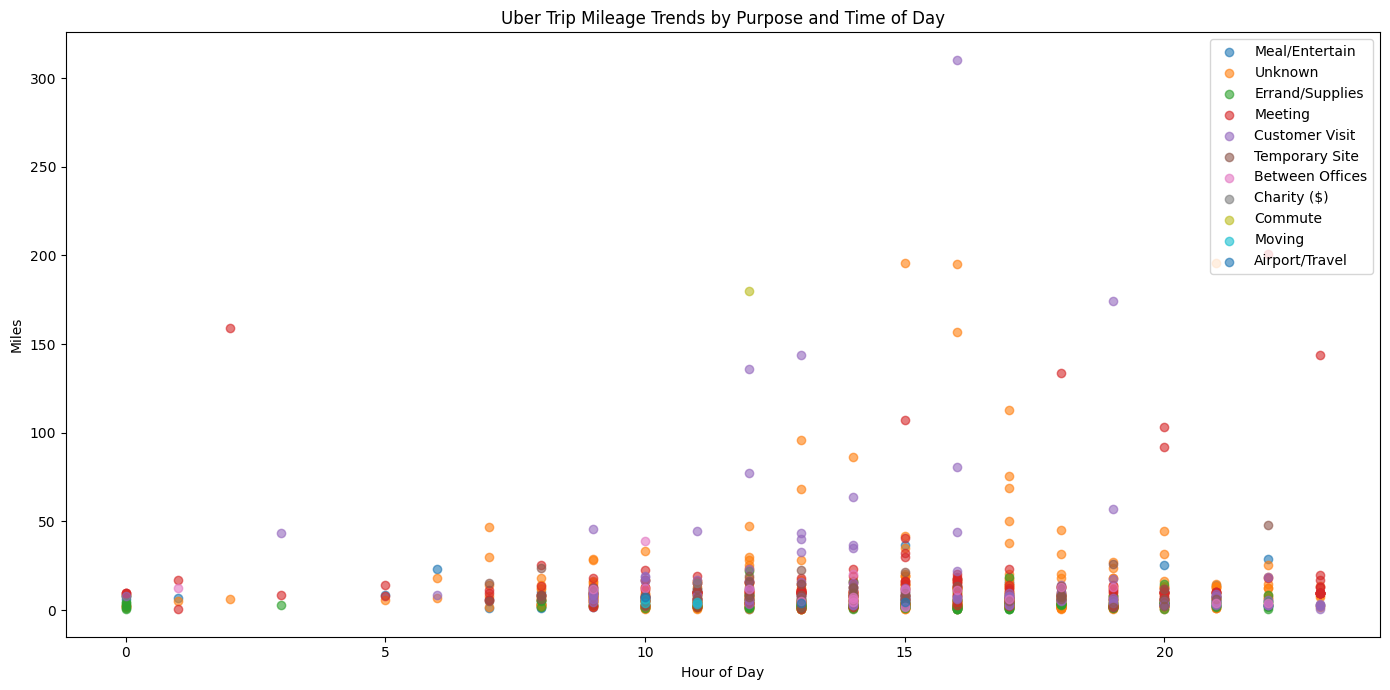

In [38]:
plt.figure(figsize=(14, 7))
for purpose in uber_data['PURPOSE'].unique():
    subset = uber_data[uber_data['PURPOSE'] == purpose]
    plt.scatter(subset['HOUR'], subset['MILES'], label=purpose, alpha=0.6)
plt.title('Uber Trip Mileage Trends by Purpose and Time of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Miles')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

# 3. Comparative Overview of Trip Lengths for Business and Personal Categories

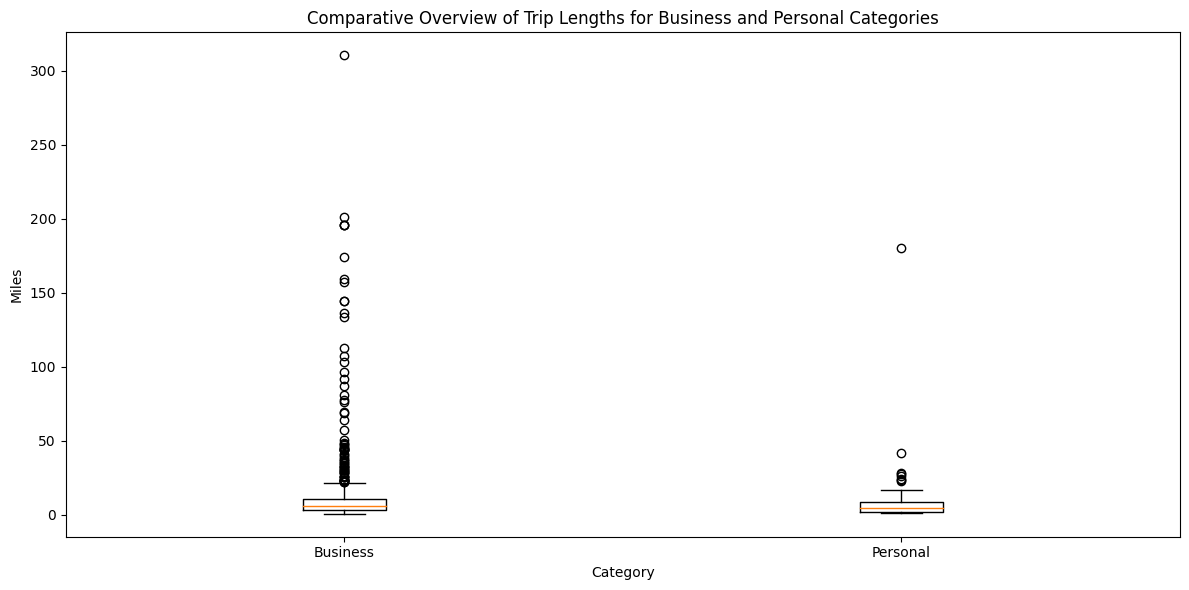

In [36]:
plt.figure(figsize=(12, 6))
categories = ['Business', 'Personal']
trip_lengths = [uber_data[uber_data['CATEGORY'] == category]['MILES'].values for category in categories]
plt.boxplot(trip_lengths, labels=categories)
plt.title('Comparative Overview of Trip Lengths for Business and Personal Categories')
plt.xlabel('Category')
plt.ylabel('Miles')
plt.tight_layout()
plt.show()